In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import time

In [2]:
print(tf.__version__)
AUTOTUNE=tf.data.experimental.AUTOTUNE

2.3.0


In [3]:
size_img = pil.Image.open('./images/train/happy/7.jpg')
print(size_img.size)

(48, 48)


In [4]:
training_data = tf.keras.preprocessing.image_dataset_from_directory('./images/train/' , labels='inferred' , label_mode='int' , color_mode='grayscale' , image_size=(48,48) , seed=50 , shuffle=True , batch_size = 16)
print(training_data.class_names)

Found 28821 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory('./images/validation/' , labels='inferred' , label_mode='int' , color_mode='grayscale' , image_size=(48,48) , seed=50 , shuffle=True)
print(validation_data.class_names)

Found 7066 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
for image_batch , labels_batch in training_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    image = image_batch[0]
    print(np.min(image) , np.max(image))
    break


(16, 48, 48, 1)
(16,)
3.0 255.0


In [7]:
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)
num_classes = 7

In [8]:
def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1./.255),
        layers.Conv2D(16 , 3 , padding="same", activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(32 , 3  , padding="same" , activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64 , 3 , padding="same" , activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(128 , activation="relu"),
        layers.Dense(num_classes)
    ])

    model.compile(
            optimizer='adam',
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'
        ])
    
    return model



In [9]:
model = get_compiled_model()
epochs = 10
print(model)
start_time = time.time()
history = model.fit(training_data , validation_data=validation_data , epochs=epochs)
print("total time = %s" %(time.time() - start_time))

Epoch 1/10
1802/1802 [==============================] - 38s 21ms/step - loss: 2.4224 - accuracy: 0.2679 - val_loss: 1.7008 - val_accuracy: 0.3255
Epoch 2/10
1802/1802 [==============================] - 33s 18ms/step - loss: 1.6425 - accuracy: 0.3491 - val_loss: 1.5731 - val_accuracy: 0.3924
Epoch 3/10
1802/1802 [==============================] - 33s 18ms/step - loss: 1.5283 - accuracy: 0.4038 - val_loss: 1.4763 - val_accuracy: 0.4407
Epoch 4/10
1802/1802 [==============================] - 33s 18ms/step - loss: 1.4358 - accuracy: 0.4440 - val_loss: 1.4584 - val_accuracy: 0.4400
Epoch 5/10
1802/1802 [==============================] - 32s 18ms/step - loss: 1.3679 - accuracy: 0.4770 - val_loss: 1.4330 - val_accuracy: 0.4550
Epoch 6/10
1802/1802 [==============================] - 33s 18ms/step - loss: 1.3179 - accuracy: 0.4956 - val_loss: 1.4202 - val_accuracy: 0.4658
Epoch 7/10
1802/1802 [==============================] - 33s 18ms/step - loss: 1.2686 - accuracy: 0.5180 - val_loss: 1.4695 -

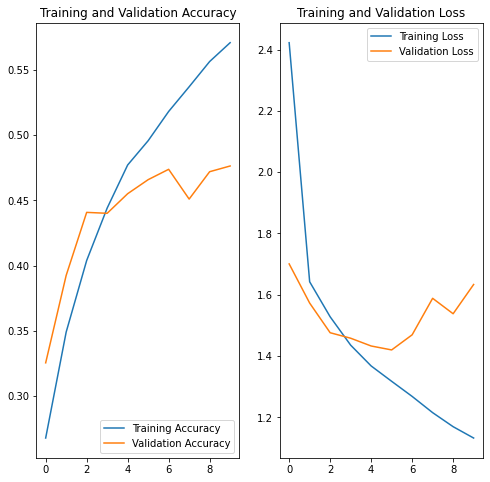

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
img = tf.keras.preprocessing.image.load_img('259.jpg' , target_size=(48 , 48) , color_mode="grayscale")
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

(1, 48, 48, 1)
[[ 2.8009903 -1.6163247  3.2617552  2.5356703  3.486412   4.121481
   1.8370049]]
This image most likely belongs to sad with a 39.53 percent confidence.


In [12]:
model.save('./models/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/assets
